In [1]:
# Update the import statement
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import all VGG specific libraries
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

In [3]:
#construct an instance if imagedatagenerator class
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.5
    
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

# Train the Model using VGG16

In [4]:
#last 3 layers is false
model = VGG16(include_top = False, input_shape = (224,224,3))

In [5]:
#layers loaded are not trainable
for layer in model.layers:
    layer.trainable = False

In [6]:
#flatten the output from second last fully connected layer in VGG
flatten_layer = layers.Flatten()(model.output)

#fully connected layer with 512 hidden units
flattened_fc_layer = layers.Dense(512, activation='relu')(flatten_layer)

#the last layer, fully connected sigmoid with 5 neurons
flattened_fc_softmax_layer = layers.Dense(5, activation = 'softmax')(flattened_fc_layer)

In [7]:
# connect the custom layer with my model
model = Model(inputs = model.inputs, outputs=flattened_fc_softmax_layer)

In [8]:
training_iterator = train_datagen.flow_from_directory(r'E:\Udemy\GAN_DLNN\flower\flowers_resized\Train', batch_size = 64, target_size = (224,224))
testing_iterator = train_datagen.flow_from_directory(r'E:\Udemy\GAN_DLNN\flower\flowers_resized\Test', batch_size = 64, target_size = (224,224))

Found 3088 images belonging to 5 classes.
Found 1246 images belonging to 5 classes.


In [9]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam' )
history = model.fit(training_iterator, validation_data = testing_iterator, epochs = 50)

Epoch 1/50


C:\Users\Zahid\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 313s 6s/step - accuracy: 0.3560 - loss: 6.2786 - val_accuracy: 0.6806 - val_loss: 0.8641
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 295s 6s/step - accuracy: 0.7067 - loss: 0.8245 - val_accuracy: 0.6669 - val_loss: 0.8635
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.7286 - loss: 0.7329 - val_accuracy: 0.7095 - val_loss: 0.7658
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 297s 6s/step - accuracy: 0.7615 - loss: 0.6594 - val_accuracy: 0.7592 - val_loss: 0.6704
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 289s 6s/step - accuracy: 0.7914 - loss: 0.5755 - val_accuracy: 0.7215 - val_loss: 0.7561
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 286s 6s/step - accuracy: 0.7755 - loss: 0.6081 - val_accuracy: 0.7239 - val_loss: 0.7531
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.7932 - loss: 0.5703 - val_accuracy: 0.7352 - val_loss: 0.7363
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 281s 6s/step - accuracy: 0.7953 - loss: 0.5329 - val_accuracy: 0.7520 - val_loss: 0.

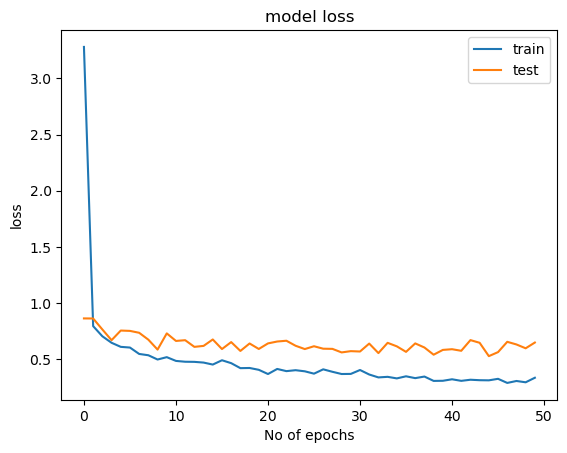

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('No of epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

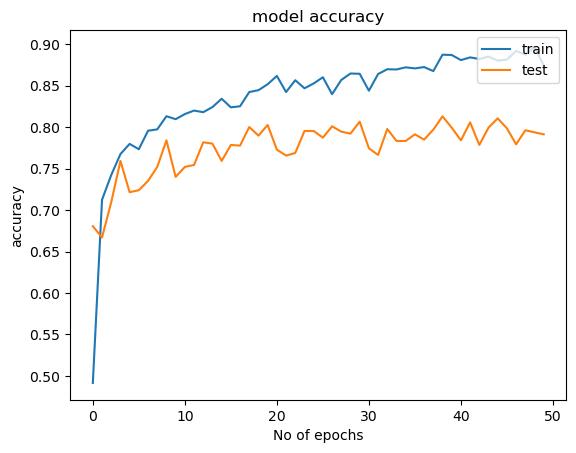

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('No of epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [12]:
class_labels = training_iterator.class_indices
class_labels

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [13]:
#save the model
model.save(r'E:\Udemy\GAN_DLNN\flower\VGG19/Flower_vgg16_224_224.keras')

# Make Predictions and Test the Model

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,  img_to_array

In [15]:
model = load_model(r'E:\Udemy\GAN_DLNN\flower\VGG19/Flower_vgg16_224_224.keras')

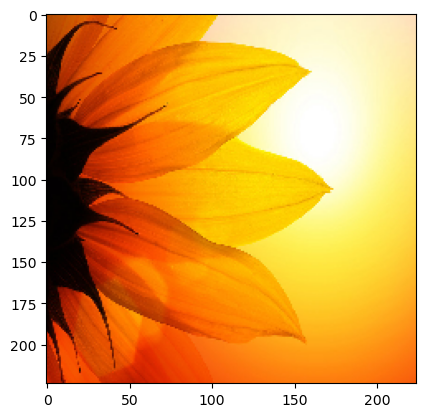

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
[[1.0506377e-20 6.4453773e-18 6.1240007e-07 9.9999940e-01 1.0559603e-30]]


'sunflower'

In [16]:
#image must be 224*224
img = load_img(r'E:\Udemy\GAN_DLNN\flower\VGG19\Image_predictions\sun_pred_2.jpg', target_size=(224,224))
plt.imshow(img)
plt.show()
#convert img to array and add dimension
img = img_to_array(img)
img = img.reshape(1,224,224,3)
pred = model.predict(img)
print(pred)
result = np.argmax(pred)
[key for key in class_labels][result]

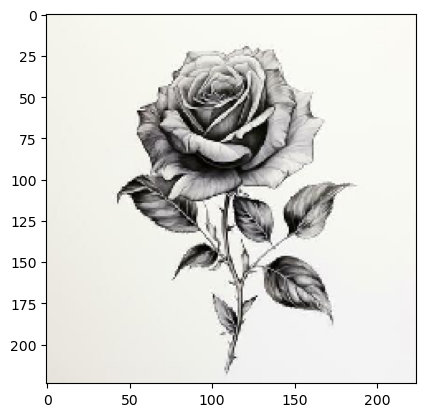

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0. 0. 1. 0. 0.]]


'rose'

In [17]:
img1 = load_img(r'E:\Udemy\GAN_DLNN\flower\VGG19\Image_predictions\rose_pred_1.jpg', target_size=(224,224))
plt.imshow(img1)
plt.show()
#convert img to array and add dimension
img1 = img_to_array(img1)
img1 = img1.reshape(1,224,224,3)
pred1 = model.predict(img1)
print(pred1)
result1 = np.argmax(pred1)
[key for key in class_labels][result1]

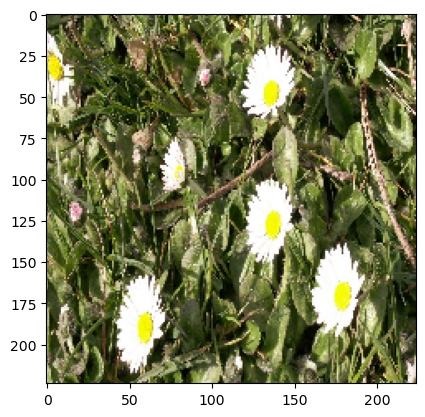

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[1. 0. 0. 0. 0.]]


'daisy'

In [18]:
img2 = load_img(r'E:\Udemy\GAN_DLNN\flower\VGG19\Image_predictions\daisy_pred_1.jpg', target_size=(224,224))
plt.imshow(img2)
plt.show()
#convert img to array and add dimension
img2 = img_to_array(img2)
img2 = img2.reshape(1,224,224,3)
pred2 = model.predict(img2)
print(pred2)
result2 = np.argmax(pred2)
[key for key in class_labels][result2]

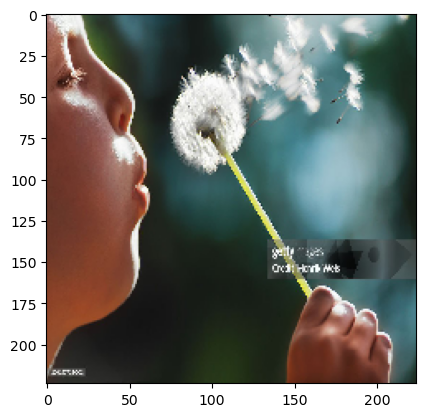

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0. 1. 0. 0. 0.]]


'dandelion'

In [19]:
img3 = load_img(r'E:\Udemy\GAN_DLNN\flower\VGG19\Image_predictions\dan_pred_2.jpg', target_size=(224,224))
plt.imshow(img3)
plt.show()
#convert img to array and add dimension
img3 = img_to_array(img3)
img3 = img3.reshape(1,224,224,3)
pred3 = model.predict(img3)
print(pred3)
result3 = np.argmax(pred3)
[key for key in class_labels][result3]

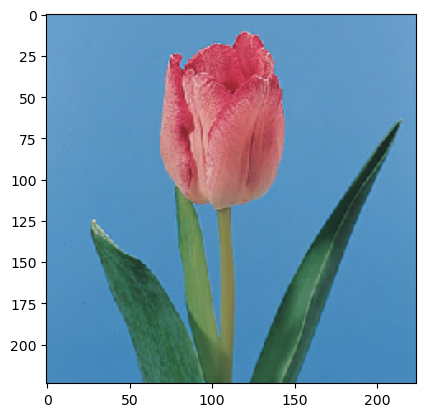

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0. 0. 0. 0. 1.]]


'tulip'

In [20]:
img4 = load_img(r'E:\Udemy\GAN_DLNN\flower\VGG19\Image_predictions\tulip_pred_2.jpg', target_size=(224,224))
plt.imshow(img4)
plt.show()
#convert img to array and add dimension
img4 = img_to_array(img4)
img4 = img4.reshape(1,224,224,3)
pred4 = model.predict(img4)
print(pred4)
result4 = np.argmax(pred4)
[key for key in class_labels][result4]

Author\
**Md Zahid Hasan**\
**Master's Degree in Artificial Intelligence**\
**Johannes Kepler University Linz**
